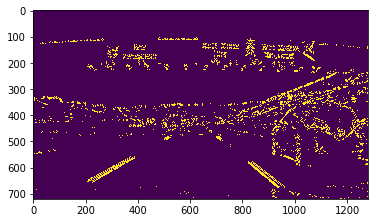

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # Apply cv2.Sobel()
    if orient == 'x':
        sobel = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=sobel_kernel)
    else:
        sobel = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=sobel_kernel)
    # Take the absolute value of the output from cv2.Sobel()
    abs_sobel = np.absolute(sobel)
    # Scale the result to an 8-bit range (0-255)
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Apply lower and upper thresholds
    grad_binary = np.zeros_like(scaled_sobel)
    grad_binary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    # Create binary_output
    return grad_binary

def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 255)):
    # Grayscale
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    #get sobel for both x&y
    sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=sobel_kernel)
    sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=sobel_kernel)
    # Take the absolute value of the output from cv2.Sobel()
    abs_sobel = np.sqrt(np.add(np.square(sobelx),np.square(sobely)))
    # Scale the result to an 8-bit range (0-255)
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Apply lower and upper thresholds
    thresh_min = mag_thresh[0]
    thresh_max = mag_thresh[1]
    mag_binary = np.zeros_like(scaled_sobel)
    mag_binary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    # Create binary_output
    return mag_binary

def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)):
     # Grayscale
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    #get sobel for both x&y
    sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=sobel_kernel)
    sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=sobel_kernel)
    # Take the absolute value of the output from cv2.Sobel()
    abs_sobel = np.arctan2(np.absolute(sobely),np.absolute(sobelx))
    # Apply lower and upper thresholds
    thresh_min = thresh[0]
    thresh_max = thresh[1]
    dir_binary = np.zeros_like(abs_sobel)
    dir_binary[(abs_sobel >= thresh_min) & (abs_sobel <= thresh_max)] = 1
    # Create binary_output
    return dir_binary

# Choose a Sobel kernel size
ksize = 15 # Choose a larger odd number to smooth gradient measurements
image = cv2.imread('signs_vehicles_xygrad.png')
# Apply each of the thresholding functions
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(20, 100))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(20, 100))
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(20, 100))
dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0.7, 1.3))

combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
plt.imshow(combined)